<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [21]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [2]:
# Read Titanic Dataset
titanic_csv = '../DATA/titanic.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [3]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [4]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [5]:
# ANSWER
titanic.shape

(891, 12)

In [6]:
titanic_long = pd.melt(titanic, id_vars = 'PassengerId')
titanic_long

,PassengerId,variable,value
0,1,Survived,0
1,2,Survived,1
2,3,Survived,1
3,4,Survived,1
4,5,Survived,0
...,...,...,...
9796,887,Embarked,S
9797,888,Embarked,S
9798,889,Embarked,S
9799,890,Embarked,C


## Check Types of Data

Check types of data you have

In [7]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [8]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

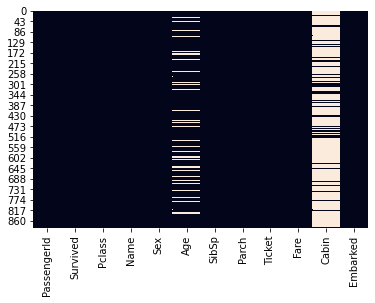

In [9]:
#visualize the location of these null values
sns.heatmap(titanic.isnull(), cbar=False)

In [10]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

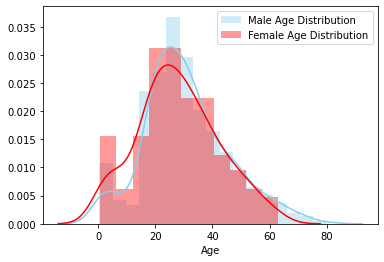

In [24]:
#understand age distribution depending on sex of passengers

titanic_m = titanic[titanic['Sex'] == 'male']
titanic_f = titanic[titanic['Sex'] == 'female']


sns.distplot( titanic_m["Age"] , color="skyblue", label="Male Age Distribution")
sns.distplot( titanic_f["Age"] , color="red", label="Female Age Distribution")
plt.legend()



In [26]:
#check how many null values for each sex

print(titanic_m['Age'].isnull().sum())
print(titanic_f['Age'].isnull().sum())

124
53


In [29]:
titanic.groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [31]:
#Replace null ages with the median age of passengers by Sex and Class
titanic["Age"].fillna(titanic.groupby(["Sex", "Pclass"])["Age"].transform(np.median), inplace=True)

In [34]:
#verify that the age column no longer has null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin

In [154]:
# Check on what unique Cabin values look like
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [38]:
#Cabin values vary wildly, might be more useful to have the letters to represent the various clases
#Create new column called cabin class

titanic['Cabin Class'] = titanic['Cabin'].str[0]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [50]:
#Identify Unique cabin classes

cab_class = titanic['Cabin Class'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [54]:
#Replace Cabin classes with numbers to enable easier translation
titanic['Cabin Class'].replace({
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
    'T' : 8
    
}, inplace = True)

titanic['Cabin Class'].unique()


array([nan,  3.,  5.,  7.,  4.,  1.,  2.,  6.,  8.])

In [66]:
#Identify expected Cabin class based on sex and Pclass
titanic.groupby(['Pclass','Sex'])['Cabin Class'].mean()

Pclass  Sex   
1       female    3.086420
        male      3.000000
2       female    5.200000
        male      5.333333
3       female    6.500000
        male      5.666667
Name: Cabin Class, dtype: float64

In [67]:
#Fill null values with mean Pclass based on sex and Pclass
titanic["Cabin Class"].fillna(titanic.groupby(["Sex", "Pclass"])["Cabin Class"].transform(np.mean), inplace=True)

In [68]:
#verify null values are gone for Cabin Class
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin Class      0
dtype: int64

In [70]:
#Replace cabin values with cabin class
titanic['Cabin'] = titanic['Cabin Class']
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin Class    0
dtype: int64

In [73]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,5.666667,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3.000000,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,6.500000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3.000000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,5.666667,S


In [74]:
#Round Cabin values to nearest integer
titanic['Cabin'].round(0)

0      6.0
1      3.0
2      6.0
3      3.0
4      6.0
      ... 
886    5.0
887    2.0
888    6.0
889    3.0
890    6.0
Name: Cabin, Length: 891, dtype: float64

### Embarked

In [93]:
#Count values by emarkation point
embark = pd.DataFrame(titanic['Embarked'].value_counts())
print(embark)

m = titanic[(titanic['Sex'] == 'male')]
f = titanic[(titanic['Sex'] == 'female')]

embark['Male'] = m['Embarked'].value_counts()
embark['Female'] = f['Embarked'].value_counts()
embark.drop(columns = ['Embarked'], inplace = True)
emT = embark.T
emT['S %'] = emT['S'] / (emT['S'] + emT['C'] + emT['Q'])
emT['C %'] = emT['C'] / (emT['S'] + emT['C'] + emT['Q'])
emT['Q %'] = emT['Q'] / (emT['S'] + emT['C'] + emT['Q'])

emT



   Embarked
S       644
C       168
Q        77


,S,C,Q,S %,C %,Q %
Male,441,95,41,0.764298,0.164645,0.071057
Female,203,73,36,0.650641,0.233974,0.115385


65% of Female passengers embarked from  Southampton (S), let's fill the null values for those passengers with S given that they are female

In [94]:
#Replace null values with S, and confirm it has been replaced
titanic["Embarked"].fillna("S", inplace = True) 

titanic['Embarked'].isnull().sum()

0

In [95]:
#final check of all null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Describe

Describe your dataset.

In [123]:
# ANSWER
titanic.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Duane, Mr. Frank",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891,NaN,NaN,NaN,29.1124,13.3044,0.42,21.5,26,36,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [125]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

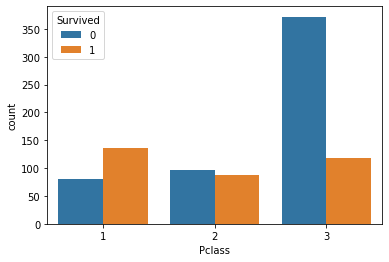

In [114]:
# Pclass 3 had the highest odds of survival out all 3 classes.
# Pclass 3 had the highest death rate in a single passenger class, almost 3X vs those who survived

sns.countplot(x=titanic['Pclass'], hue=titanic['Survived'], data=titanic)


## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

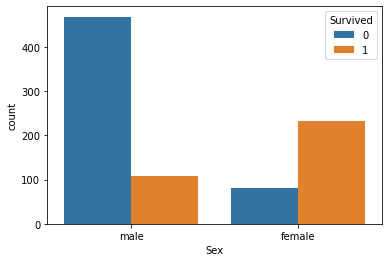

In [115]:
# ANSWER
sns.countplot(x=titanic['Sex'], hue=titanic['Survived'], data=titanic)

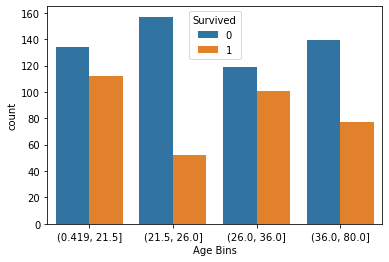

In [117]:
#can take it a step further by adding in age bins

titanic['Age Bins'] = pd.qcut(titanic['Age'], q=4)
titanic.head()

sns.countplot(x=titanic['Age Bins'], hue=titanic['Survived'], data=titanic)

## Parch

Parch = Number of parents of children travelling with each passenger.

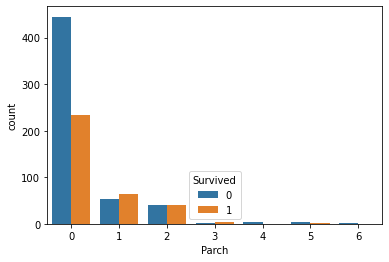

In [118]:
# ANSWER
sns.countplot(x=titanic['Parch'], hue=titanic['Survived'], data=titanic)

## SibSp

## Embarked

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [46]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

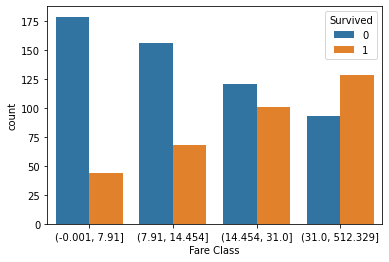

In [120]:
# ANSWER

titanic['Fare Class'] = pd.qcut(titanic['Fare'], q=4)
titanic.head()
sns.countplot(x=titanic['Fare Class'], hue=titanic['Survived'], data=titanic)

## Age Class

In [48]:
# ANSWER

In [49]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

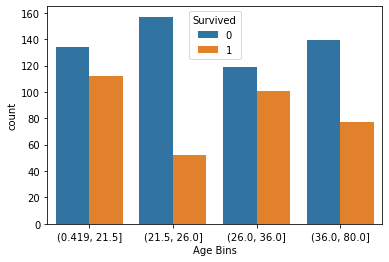

In [121]:
# ANSWER

titanic['Age Bins'] = pd.qcut(titanic['Age'], q=4)
titanic.head()

sns.countplot(x=titanic['Age Bins'], hue=titanic['Survived'], data=titanic)

# Staistical Overview

## Correlation

Find correlation between `survived` and other features.

In [126]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,1.000000,-0.005007,-0.035144,0.039033,-0.057527,-0.001652,0.012658,-0.050777
Survived,-0.005007,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307,-0.229381
Pclass,-0.035144,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500,0.851357
Age,0.039033,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692,-0.384585
SibSp,-0.057527,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651,0.097198
Parch,-0.001652,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225,0.060661
Fare,0.012658,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000,-0.554214
Cabin,-0.050777,-0.229381,0.851357,-0.384585,0.097198,0.060661,-0.554214,1.000000


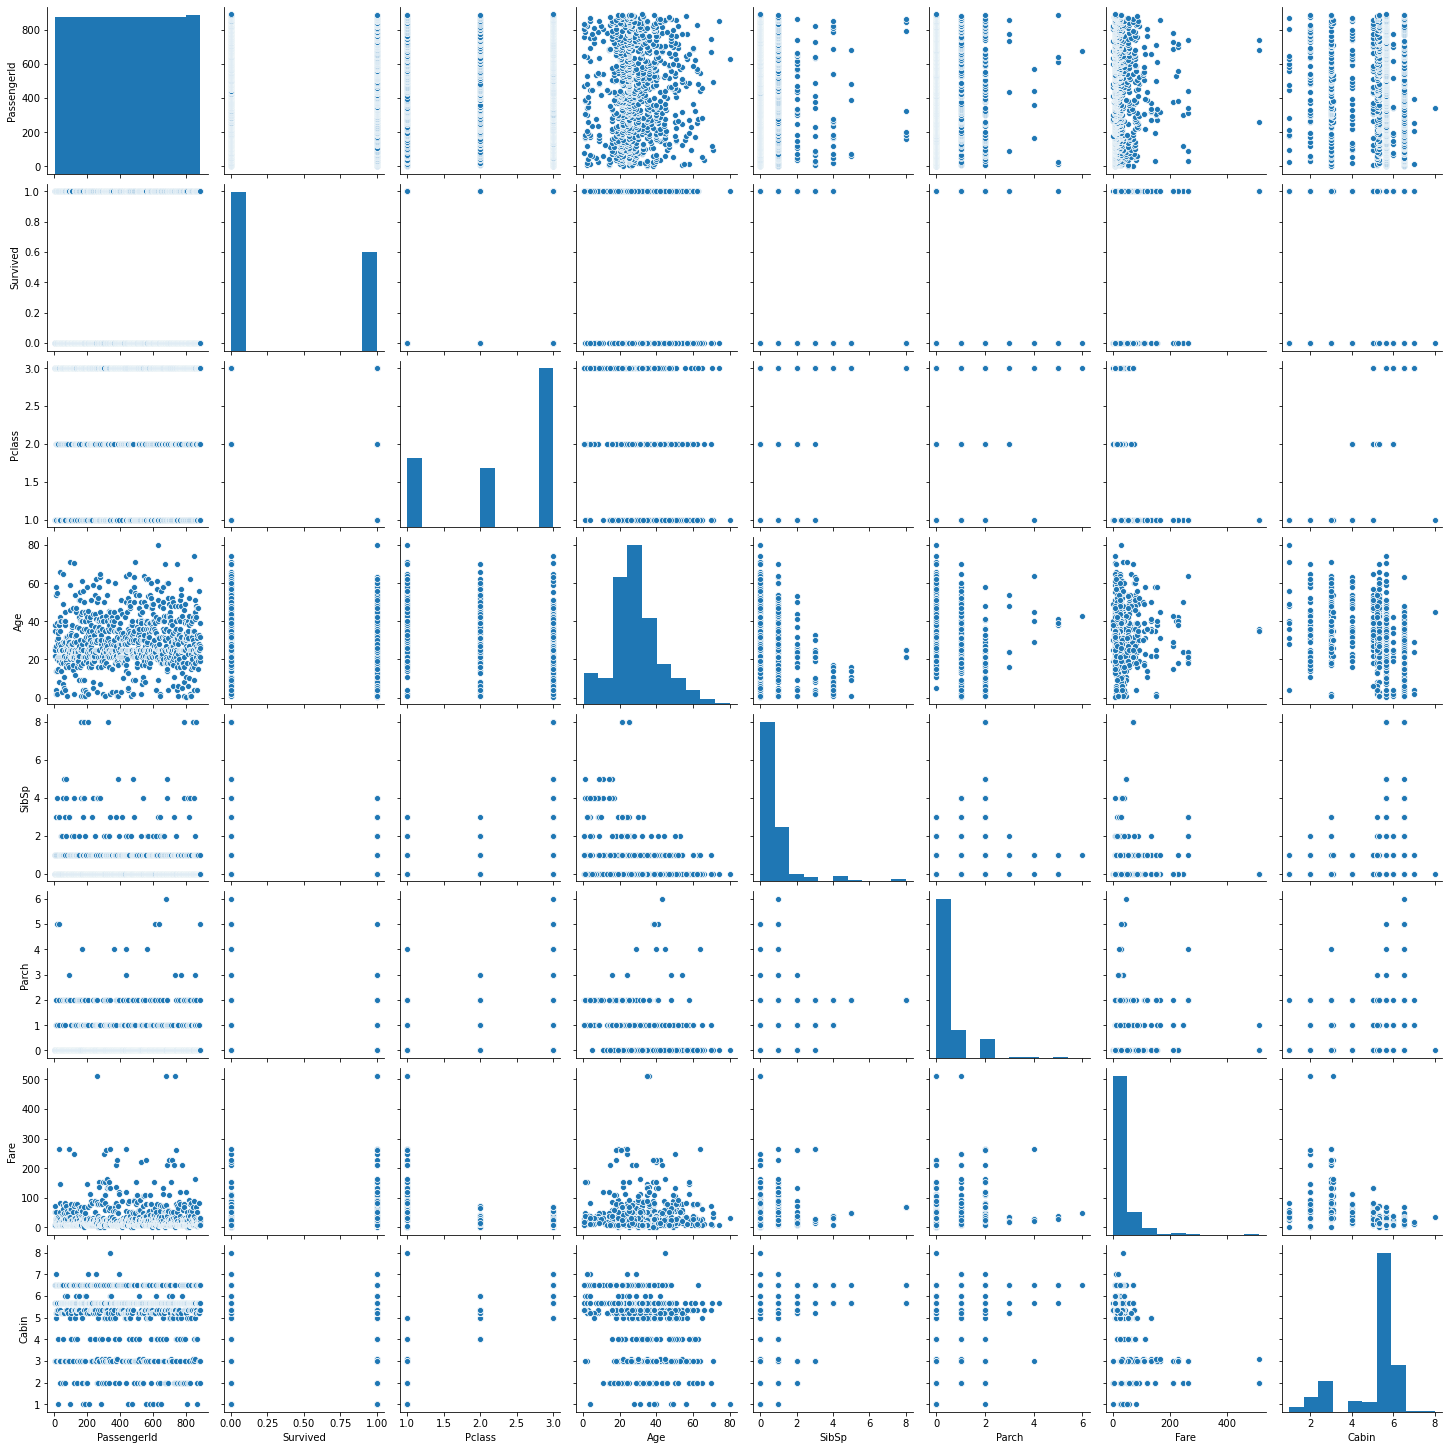

In [127]:
sns.pairplot(titanic)

# [BONUS] Hypothesis Testing
---
Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true. The usual process of hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [52]:
# ANSWER

### Set alpha (Let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [53]:
# ANSWER

### Calculate point estimate

In [54]:
a = titanic_young['Survived']
b = titanic_old['Survived']

NameError: name 'titanic_young' is not defined

In [55]:
## Calculate the variance to get the standard deviation
var_a = a.var()
var_b = b.var()

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

NameError: name 'a' is not defined

### Calculate test statistic

In [56]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

NameError: name 'a' is not defined

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [57]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

NameError: name 'N' is not defined

In [58]:
print("t = " + str(t))
print("p = " + str(2*p))

NameError: name 't' is not defined

### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [59]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [60]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

NameError: name 'stats' is not defined



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



